## FINAL PROJECT

#### Aman Solanki, Bilal Adnan, Krishna Patel, Mandeep Singh

#### BAN 620 – Data Mining
#### Professor Robert Treichler
#### California State University East Bay
#### Spring Semester 2020

In [1]:
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score  #preditive accuracy


#for imputing missing values
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

#for models used
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from dmba import plotDecisionTree

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LassoCV
from sklearn.metrics import classification_report,confusion_matrix
from dmba import regressionSummary, classificationSummary 
from sklearn import preprocessing  # imputing and scale

import itertools 

from sklearn.metrics import mean_absolute_error  #MAE
from sklearn.metrics import mean_squared_error   #RMSE

In [5]:
%matplotlib inline

In [6]:
original_df=pd.read_csv('Wine.csv') 

| Column              | Description                                                                           |       
| ------------------- | ------------------------------------------------------------------------------------- | 
| INDEX               | wine Identification Variable
| TARGET              | number of Wine Cases ordered
| FixedAcidity        | most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
| VolatileAcidity     | the amount of acetic acid in wine
| CitricAcid          | citric acid amount in wine
| ResidualSugar       | the amount of sugar remaining after fermentation stops
| Chlorides           | the amount of salt in the wine
| FreeSulfurDioxide	  | the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
| TotalSulfurDioxide  | amount of free and bound forms of S02
| Density             | the density of water is close to that of water depending on the percent alcohol and sugar content
| pH                  | describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
| Sulphates           | a wine additive which can contribute to sulfur dioxide gas (S02) levels
| Alcohol             | the percent alcohol content of the wine
| LabelAppeal         | score indicating the appeal of label design for consumers. 
| AcidIndex           | proprietary method of testing total acidity of wine by using a weighted average
| STARS               | Wine Rating

In [7]:
original_df.info() #data contains missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
INDEX                 12795 non-null int64
TARGET                12795 non-null int64
FixedAcidity          12795 non-null float64
VolatileAcidity       12795 non-null float64
CitricAcid            12795 non-null float64
ResidualSugar         12179 non-null float64
Chlorides             12157 non-null float64
FreeSulfurDioxide     12148 non-null float64
TotalSulfurDioxide    12113 non-null float64
Density               12795 non-null float64
pH                    12400 non-null float64
Sulphates             11585 non-null float64
Alcohol               12142 non-null float64
LabelAppeal           12795 non-null int64
AcidIndex             12795 non-null int64
STARS                 9436 non-null float64
dtypes: float64(12), int64(4)
memory usage: 1.6 MB


In [8]:
original_df.head(2) #data contains negative values

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.16,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.16,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0


[]

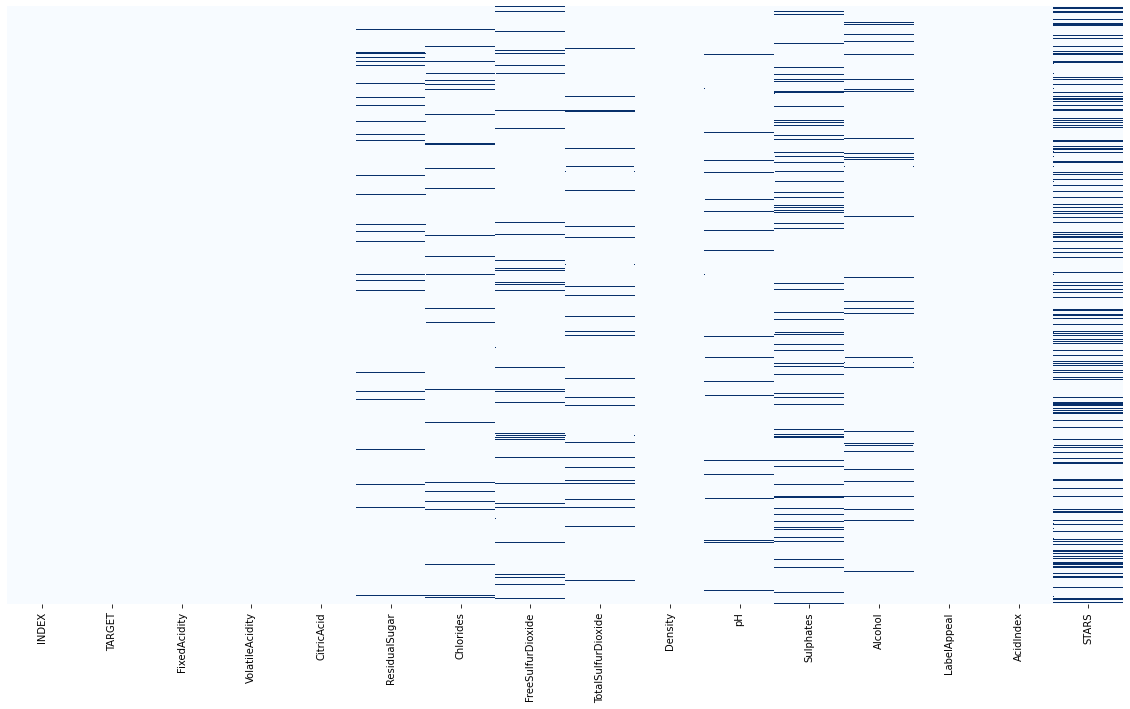

In [9]:
#checking columns with missing values
naInfo = np.zeros(original_df.shape)
naInfo[original_df.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=original_df.columns)
fig, ax = plt.subplots()
fig.set_size_inches(20, 11)
ax = sns.heatmap(naInfo, vmin=0, vmax=0.1, cmap='Blues', cbar=False)
ax.set_yticks([])

In [10]:
print('Features with missing values:') 
print('1. ResidualSugar has', original_df['ResidualSugar'].isnull().sum(), 'missing values' )
print('2. Chlorides has', original_df['Chlorides'].isnull().sum(), 'missing values')
print('3. FreeSulfurDioxide has', original_df['FreeSulfurDioxide'].isnull().sum(), 'missing values')
print('4. TotalSulfurDioxide has', original_df['TotalSulfurDioxide'].isnull().sum(), 'missing values')
print('5. pH has', original_df['pH'].isnull().sum(), 'missing values')
print('6. Sulphates has', original_df['Sulphates'].isnull().sum(), 'missing values')
print('7. Alcohol has', original_df['Alcohol'].isnull().sum(), 'missing values')
print('8. STARS has', original_df['STARS'].isnull().sum(), 'missing values')

Features with missing values:
1. ResidualSugar has 616 missing values
2. Chlorides has 638 missing values
3. FreeSulfurDioxide has 647 missing values
4. TotalSulfurDioxide has 682 missing values
5. pH has 395 missing values
6. Sulphates has 1210 missing values
7. Alcohol has 653 missing values
8. STARS has 3359 missing values


In [11]:
original_df.describe() #data contains negative values

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


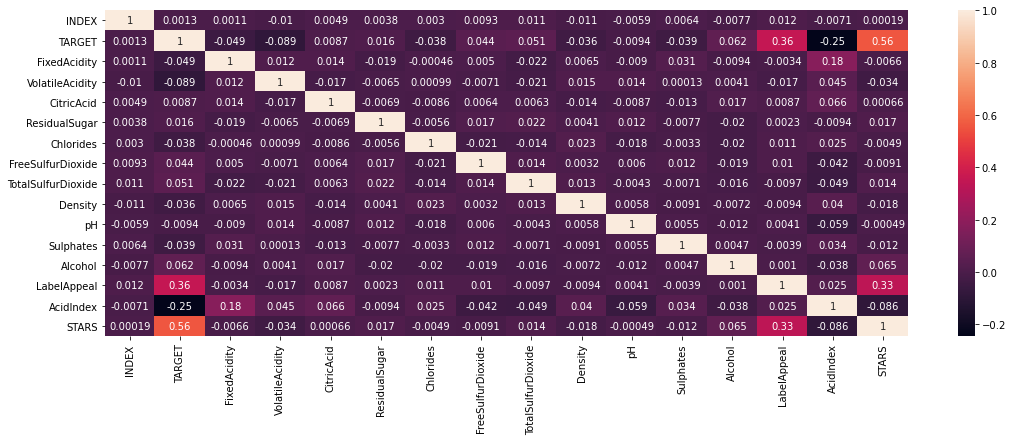

In [12]:
plt.figure(figsize=(18,6))
sns.heatmap(original_df.corr(),annot=True)

In [13]:
test_df=original_df #for imputing missing values and fixing outliers

In [14]:
print('Fixed Acidity has', np.sum(test_df['FixedAcidity'] < 0), 'negative values')
print('Volatile Acidity has', np.sum(test_df['VolatileAcidity'] < 0), 'negative values')
print('Citric Acid has', np.sum(test_df['CitricAcid'] < 0), 'negative values')
print('Residual Sugar has', np.sum(test_df['ResidualSugar'] < 0), 'negative values')
print('Chlorides has', np.sum(test_df['Chlorides'] < 0), 'negative values')
print('Free SulfurDioxide has', np.sum(test_df['FreeSulfurDioxide'] < 0), 'negative values')
print('Total SulfurDioxide has', np.sum(test_df['TotalSulfurDioxide'] < 0), 'negative values')
print('Sulphates has', np.sum(test_df['Sulphates'] < 0), 'negative values')
print('Alcohol has', np.sum(test_df['Alcohol'] < 0), 'negative values')

Fixed Acidity has 1621 negative values
Volatile Acidity has 2827 negative values
Citric Acid has 2966 negative values
Residual Sugar has 3136 negative values
Chlorides has 3197 negative values
Free SulfurDioxide has 3036 negative values
Total SulfurDioxide has 2504 negative values
Sulphates has 2361 negative values
Alcohol has 118 negative values


In [15]:
#fixing the negative values under the assumption that the negative sign was added accidently
#fixed using absolute values of the columns containing negative values
no_negative_df=original_df
no_negative_df['FixedAcidity'] = abs(no_negative_df['FixedAcidity'])
no_negative_df['VolatileAcidity'] = abs(no_negative_df['VolatileAcidity'])
no_negative_df['CitricAcid'] = abs(no_negative_df['CitricAcid'])
no_negative_df['ResidualSugar'] = abs(no_negative_df['ResidualSugar'])
no_negative_df['Sulphates'] = abs(no_negative_df['Sulphates'])
no_negative_df['Chlorides'] = abs(no_negative_df['Chlorides'])
no_negative_df['FreeSulfurDioxide'] = abs(no_negative_df['FreeSulfurDioxide'])
no_negative_df['TotalSulfurDioxide'] = abs(no_negative_df['TotalSulfurDioxide'])
no_negative_df['Alcohol'] = abs(no_negative_df['Alcohol'])

In [16]:
test_df.head(2)

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.16,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,2,3,4.5,0.16,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0


In [17]:
imputer = IterativeImputer(random_state=0)  #impute missing values
test_df.iloc[:,1:]=imputer.fit_transform(test_df.iloc[:,1:]) #replace df with imputed missing values

In [18]:
test_df.isnull().sum()  #no missing values

INDEX                 0
TARGET                0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
STARS                 0
dtype: int64

In [19]:
test_df.columns

Index(['INDEX', 'TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'STARS'],
      dtype='object')

In [20]:
#clean column headers
test_df.columns=['INDEX', 'Target', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides','FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH','Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'Stars']

In [21]:
df=test_df #final dataset to be used for models

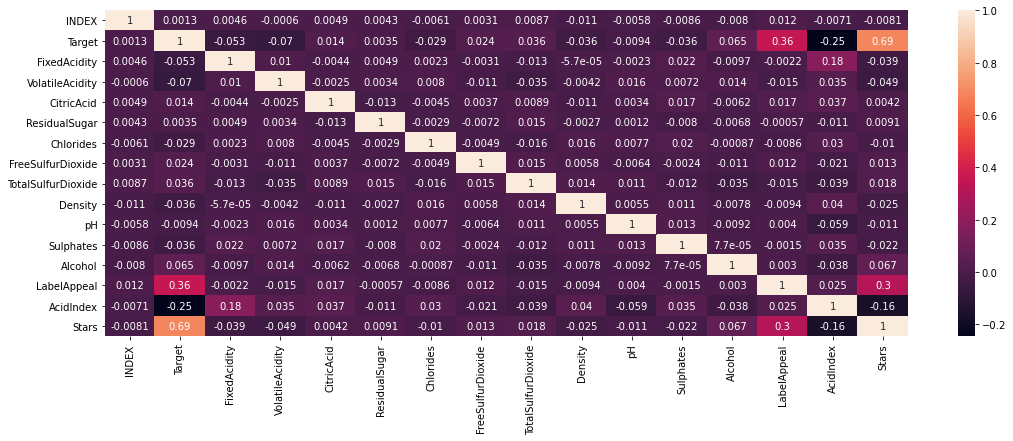

In [22]:
#correlation heatmap
#target and stars have a strong coorelation
plt.figure(figsize=(18,6))
sns.heatmap(df.corr(),annot=True)

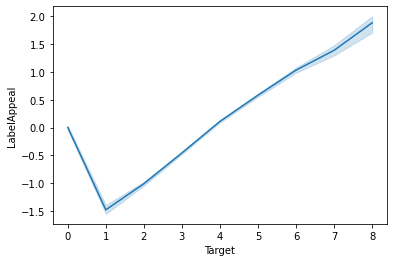

In [23]:
sns.lineplot(x=df['Target'], y=df['LabelAppeal'])

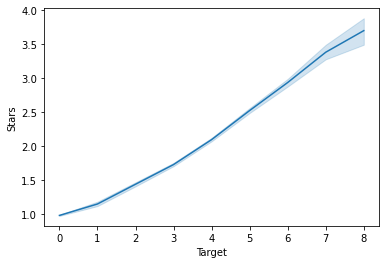

In [24]:
sns.lineplot(x=df['Target'], y=df['Stars'])

##### Train, Validate and Test Data

In [25]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(df.iloc[:,2:])

df_scaled=pd.DataFrame(scaler.transform(df.iloc[:,2:]), columns=df.columns[2:])

X = df_scaled #predictor variables
y = df['Target'] #outcome variable

#training (50%), validation (30%), and test (20%) partition
train_X, temp_X, train_y, temp_y = train_test_split(X, y, test_size=0.5, random_state=1)
valid_X, test_X, valid_y, test_y = train_test_split(temp_X, temp_y, test_size=0.4, random_state=1)

print('Training : ', train_X.shape)
print('Validation : ', valid_X.shape)
print('Test : ', test_X.shape)

Training :  (6397, 14)
Validation :  (3838, 14)
Test :  (2560, 14)


# KNN Model

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [27]:
pred_knn = knn.predict(test_X)

In [28]:
print(confusion_matrix(test_y,pred_knn))

[[273  12  55  83  92  30   2   0   0]
 [ 16  10  16   5   2   0   0   0   0]
 [ 42  17  65  81  26  10   2   0   0]
 [ 75  10  65 157 157  62   2   1   0]
 [ 66   1  15 144 239 130  29   3   0]
 [ 21   0   9  45 136 113  44  13   1]
 [  2   0   0  13  34  56  35   9   0]
 [  0   0   0   1   1  18   5   5   0]
 [  0   0   0   0   0   1   2   1   0]]


In [29]:
print(classification_report(test_y,pred_knn))

              precision    recall  f1-score   support

         0.0       0.55      0.50      0.52       547
         1.0       0.20      0.20      0.20        49
         2.0       0.29      0.27      0.28       243
         3.0       0.30      0.30      0.30       529
         4.0       0.35      0.38      0.36       627
         5.0       0.27      0.30      0.28       382
         6.0       0.29      0.23      0.26       149
         7.0       0.16      0.17      0.16        30
         8.0       0.00      0.00      0.00         4

    accuracy                           0.35      2560
   macro avg       0.27      0.26      0.26      2560
weighted avg       0.35      0.35      0.35      2560



In [30]:
#performance metrics
print('Training:')
regressionSummary(train_y, knn.predict(train_X))
print('\n')
print('Validation:')
regressionSummary(valid_y, knn.predict(valid_X))
print('\n')
print('Testing:')
regressionSummary(test_y, knn.predict(test_X))

Training:

Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.0000
     Mean Absolute Error (MAE) : 0.0000


Validation:

Regression statistics

               Mean Error (ME) : -0.0896
Root Mean Squared Error (RMSE) : 1.7750
     Mean Absolute Error (MAE) : 1.2043


Testing:

Regression statistics

               Mean Error (ME) : -0.0848
Root Mean Squared Error (RMSE) : 1.7824
     Mean Absolute Error (MAE) : 1.2230


##### Finding Appropiate Hyperparameters

In [31]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_X,train_y)
    pred_i = knn.predict(test_X)
    error_rate.append(np.mean(pred_i != test_y))

Text(0, 0.5, 'Error Rate')

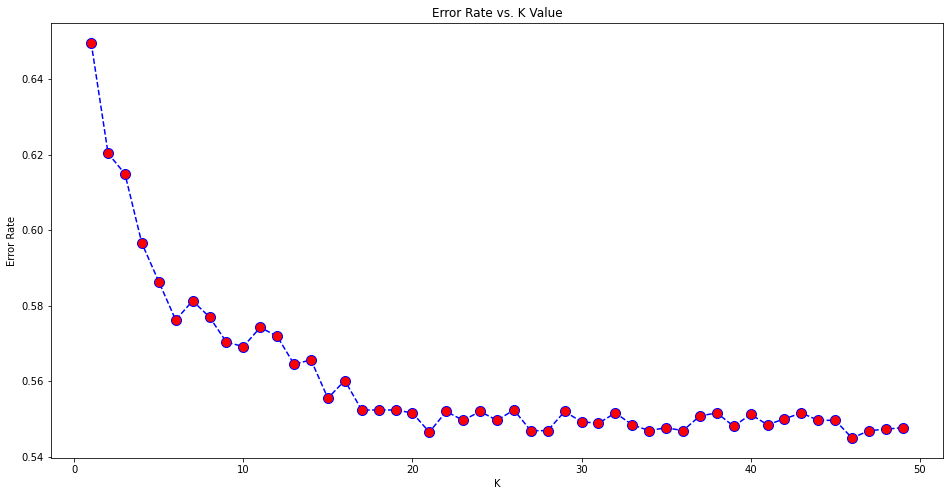

In [32]:
plt.figure(figsize=(16,8))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
# NOW WITH K=46
print(confusion_matrix(test_y,pred_knn))

[[273  12  55  83  92  30   2   0   0]
 [ 16  10  16   5   2   0   0   0   0]
 [ 42  17  65  81  26  10   2   0   0]
 [ 75  10  65 157 157  62   2   1   0]
 [ 66   1  15 144 239 130  29   3   0]
 [ 21   0   9  45 136 113  44  13   1]
 [  2   0   0  13  34  56  35   9   0]
 [  0   0   0   1   1  18   5   5   0]
 [  0   0   0   0   0   1   2   1   0]]


In [34]:
# NOW WITH K=46
knn = KNeighborsClassifier(n_neighbors=46, algorithm='auto', n_jobs=-1)

knn.fit(train_X,train_y)
pred_knn = knn.predict(test_X)

print('WITH K=46')
print(classification_report(test_y,pred_knn))

WITH K=46
              precision    recall  f1-score   support

         0.0       0.56      0.89      0.68       547
         1.0       0.00      0.00      0.00        49
         2.0       0.35      0.18      0.24       243
         3.0       0.41      0.32      0.36       529
         4.0       0.42      0.51      0.46       627
         5.0       0.37      0.37      0.37       382
         6.0       0.33      0.03      0.05       149
         7.0       0.00      0.00      0.00        30
         8.0       0.00      0.00      0.00         4

    accuracy                           0.46      2560
   macro avg       0.27      0.26      0.24      2560
weighted avg       0.42      0.46      0.41      2560



In [35]:
#performance metrics
print('Training:')
regressionSummary(train_y, knn.predict(train_X))
print('\n')
print('Validation:')
regressionSummary(valid_y, knn.predict(valid_X))
print('\n')
print('Testing:')
regressionSummary(test_y, knn.predict(test_X))

Training:

Regression statistics

               Mean Error (ME) : 0.5084
Root Mean Squared Error (RMSE) : 1.5811
     Mean Absolute Error (MAE) : 0.9364


Validation:

Regression statistics

               Mean Error (ME) : 0.5224
Root Mean Squared Error (RMSE) : 1.6365
     Mean Absolute Error (MAE) : 0.9997


Testing:

Regression statistics

               Mean Error (ME) : 0.4602
Root Mean Squared Error (RMSE) : 1.5816
     Mean Absolute Error (MAE) : 0.9836


Text(0, 0.5, 'Predicted Y')

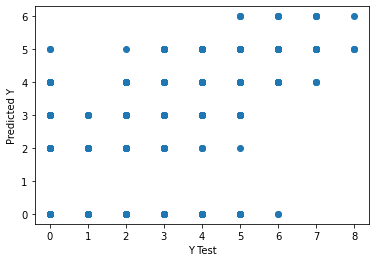

In [36]:
plt.scatter(test_y,pred_knn)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

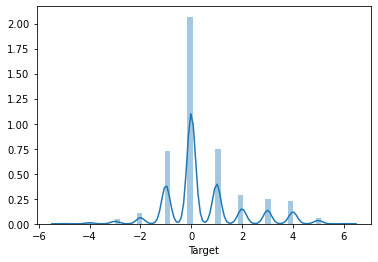

In [37]:
sns.distplot((test_y-pred_knn),bins=50)

In [38]:
print('For KNN Model, we got an accuracy of',(knn.score(test_X,test_y)*100),'%')

For KNN Model, we got an accuracy of 45.5078125 %


# Support Vector Machine Model

In [39]:
svc_model = SVC()
svc_model.fit(train_X,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
pred_svc = svc_model.predict(test_X)

In [41]:
print(confusion_matrix(test_y,pred_svc))

[[524   0   4   5  12   2   0   0   0]
 [ 18   0  24   7   0   0   0   0   0]
 [ 88   0  33 101  20   1   0   0   0]
 [151   0  28 128 216   6   0   0   0]
 [136   0   1  58 335  97   0   0   0]
 [ 40   0   1  12 163 156  10   0   0]
 [  2   0   0   0  28  94  25   0   0]
 [  0   0   0   0   2  20   8   0   0]
 [  0   0   0   0   0   1   3   0   0]]


In [42]:
print(classification_report(test_y,pred_svc))

              precision    recall  f1-score   support

         0.0       0.55      0.96      0.70       547
         1.0       0.00      0.00      0.00        49
         2.0       0.36      0.14      0.20       243
         3.0       0.41      0.24      0.30       529
         4.0       0.43      0.53      0.48       627
         5.0       0.41      0.41      0.41       382
         6.0       0.54      0.17      0.26       149
         7.0       0.00      0.00      0.00        30
         8.0       0.00      0.00      0.00         4

    accuracy                           0.47      2560
   macro avg       0.30      0.27      0.26      2560
weighted avg       0.44      0.47      0.42      2560



In [43]:
#performance metrics
print('Training:')
regressionSummary(train_y, svc_model.predict(train_X))
print('\n')
print('Validation:')
regressionSummary(valid_y, svc_model.predict(valid_X))
print('\n')
print('Testing:')
regressionSummary(test_y, svc_model.predict(test_X))

Training:

Regression statistics

               Mean Error (ME) : 0.5567
Root Mean Squared Error (RMSE) : 1.6131
     Mean Absolute Error (MAE) : 0.9409


Validation:

Regression statistics

               Mean Error (ME) : 0.5644
Root Mean Squared Error (RMSE) : 1.6506
     Mean Absolute Error (MAE) : 0.9937


Testing:

Regression statistics

               Mean Error (ME) : 0.5062
Root Mean Squared Error (RMSE) : 1.5949
     Mean Absolute Error (MAE) : 0.9734


##### Finding Appropiate Hyperparameters

In [44]:
# user grid search to find appropirate parameters

param_grid = {
    'C': [0.1,1.0, 10.0, 100.0], 
    'gamma': [1.0,0.1,0.01,0.001]
}

gridSearch = GridSearchCV(SVC(random_state=1), 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

svc_new = gridSearch.best_estimator_

Improved parameters:  {'C': 10.0, 'gamma': 1.0}


In [45]:
svc_model = SVC(C= 10.0, gamma= 1.0)
svc_model.fit(train_X,train_y)

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
pred_svc = svc_model.predict(test_X)

In [47]:
print(confusion_matrix(test_y,pred_svc))

[[503   1  12  17  12   2   0   0   0]
 [  8   3  29   9   0   0   0   0   0]
 [ 50   2  64 110  16   1   0   0   0]
 [113   0  43 161 204   8   0   0   0]
 [128   0   4  70 318 104   3   0   0]
 [ 35   0   1  19 154 153  20   0   0]
 [  2   0   1   0  26  83  36   1   0]
 [  0   0   0   0   2  18   9   1   0]
 [  0   0   0   0   0   1   3   0   0]]


In [48]:
print(classification_report(test_y,pred_svc))

              precision    recall  f1-score   support

         0.0       0.60      0.92      0.73       547
         1.0       0.50      0.06      0.11        49
         2.0       0.42      0.26      0.32       243
         3.0       0.42      0.30      0.35       529
         4.0       0.43      0.51      0.47       627
         5.0       0.41      0.40      0.41       382
         6.0       0.51      0.24      0.33       149
         7.0       0.50      0.03      0.06        30
         8.0       0.00      0.00      0.00         4

    accuracy                           0.48      2560
   macro avg       0.42      0.30      0.31      2560
weighted avg       0.47      0.48      0.46      2560



In [49]:
#performance metrics
print('Training:')
regressionSummary(train_y, svc_model.predict(train_X))
print('\n')
print('Validation:')
regressionSummary(valid_y, svc_model.predict(valid_X))
print('\n')
print('Testing:')
regressionSummary(test_y, svc_model.predict(test_X))

Training:

Regression statistics

               Mean Error (ME) : 0.4013
Root Mean Squared Error (RMSE) : 1.4604
     Mean Absolute Error (MAE) : 0.7824


Validation:

Regression statistics

               Mean Error (ME) : 0.4468
Root Mean Squared Error (RMSE) : 1.5737
     Mean Absolute Error (MAE) : 0.9304


Testing:

Regression statistics

               Mean Error (ME) : 0.3852
Root Mean Squared Error (RMSE) : 1.5281
     Mean Absolute Error (MAE) : 0.9141


Text(0, 0.5, 'Predicted Y')

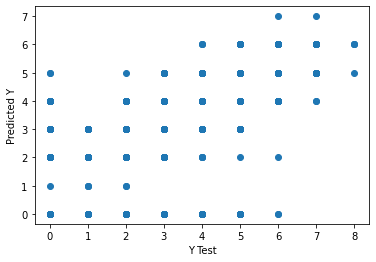

In [50]:
plt.scatter(test_y,pred_svc)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

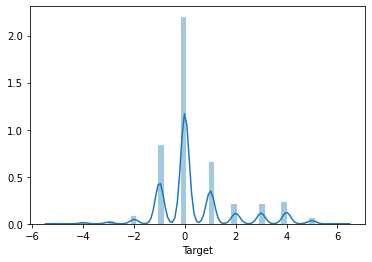

In [51]:
sns.distplot((test_y-pred_svc),bins=50)

In [52]:
print('For SVC Model, we got an accuracy of',(svc_model.score(test_X,test_y)*100),'%')

For SVC Model, we got an accuracy of 48.3984375 %


# LassoCV Regression Model

In [53]:
# train LassoCV regression model
reg = LassoCV(normalize=True, cv=5)
reg.fit(train_X, train_y)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [54]:
pred_lassoCV = reg.predict(test_X)

In [55]:
#performance metrics
print('Training:')
regressionSummary(train_y, reg.predict(train_X))
print('\n')
print('Validation:')
regressionSummary(valid_y, reg.predict(valid_X))
print('\n')
print('Testing:')
regressionSummary(test_y, reg.predict(test_X))

Training:

Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 1.3402
     Mean Absolute Error (MAE) : 1.1016


Validation:

Regression statistics

               Mean Error (ME) : 0.0219
Root Mean Squared Error (RMSE) : 1.3374
     Mean Absolute Error (MAE) : 1.0966


Testing:

Regression statistics

               Mean Error (ME) : -0.0539
Root Mean Squared Error (RMSE) : 1.3217
     Mean Absolute Error (MAE) : 1.0841


In [56]:
print('For LassoCV Regression Model, we got an accuracy of',(reg.score(test_X,test_y)*100),'%')

For LassoCV Regression Model, we got an accuracy of 52.618344546147846 %


# Ridge Regression Model

In [57]:
# train Ridge regression model
reg2 = Ridge(normalize=True, alpha=1.0)
reg2.fit(train_X, train_y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [58]:
pred_ridge = reg2.predict(test_X)

In [59]:
#performance metrics
print('Training:')
regressionSummary(train_y, reg2.predict(train_X))
print('\n')
print('Validation:')
regressionSummary(valid_y, reg2.predict(valid_X))
print('\n')
print('Testing:')
regressionSummary(test_y, reg2.predict(test_X))

Training:

Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 1.4774
     Mean Absolute Error (MAE) : 1.1984


Validation:

Regression statistics

               Mean Error (ME) : 0.0018
Root Mean Squared Error (RMSE) : 1.4678
     Mean Absolute Error (MAE) : 1.1860


Testing:

Regression statistics

               Mean Error (ME) : -0.0480
Root Mean Squared Error (RMSE) : 1.4589
     Mean Absolute Error (MAE) : 1.1811


In [60]:
print('For Ridge Regression Model, we got an accuracy of',(reg2.score(test_X,test_y)*100),'%')

For Ridge Regression Model, we got an accuracy of 42.26800385040945 %


# Random Forest Model

In [61]:
clf = AdaBoostClassifier(RandomForestClassifier(max_depth=8,min_samples_split=3,
                                                min_samples_leaf=1,max_samples=0.7,
                                                max_features=8,random_state=1), n_estimators=100, random_state=1)

param_grid = {}

gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

rfc = gridSearch.best_estimator_

print(rfc)

Improved parameters:  {}
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=8,
                                                         max_features=8,
                                                         max_leaf_nodes=None,
                                                         max_samples=0.7,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=3,
                       

In [62]:
rfc = RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=8,
                                                         max_features=8,
                                                         max_leaf_nodes=None,
                                                         max_samples=0.7,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=3,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                                         n_jobs=None,
                                                         oob_score=False,
                                                         random_state=1,
                                                         verbose=0,
                                                         warm_start=False)

In [63]:
rfc.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=8,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [64]:
pred_rfc = rfc.predict(test_X)

In [65]:
print(classification_report(test_y,pred_rfc))

              precision    recall  f1-score   support

         0.0       0.91      0.81      0.86       547
         1.0       1.00      0.51      0.68        49
         2.0       0.64      0.55      0.59       243
         3.0       0.49      0.53      0.51       529
         4.0       0.49      0.64      0.56       627
         5.0       0.47      0.48      0.48       382
         6.0       0.55      0.23      0.32       149
         7.0       0.00      0.00      0.00        30
         8.0       0.00      0.00      0.00         4

    accuracy                           0.59      2560
   macro avg       0.51      0.42      0.44      2560
weighted avg       0.60      0.59      0.59      2560



In [66]:
print(confusion_matrix(test_y,pred_rfc))

[[444   0  11  59  30   3   0   0   0]
 [  0  25  13  11   0   0   0   0   0]
 [  2   0 134  89  17   1   0   0   0]
 [  7   0  45 281 189   7   0   0   0]
 [ 14   0   4 115 403  91   0   0   0]
 [ 17   0   2  19 147 184  13   0   0]
 [  2   0   0   0  26  87  34   0   0]
 [  0   0   0   0   3  15  12   0   0]
 [  0   0   0   0   0   1   3   0   0]]


In [67]:
#performance metrics
print('Training:')
regressionSummary(train_y, rfc.predict(train_X))
print('\n')
print('Validation:')
regressionSummary(valid_y, rfc.predict(valid_X))
print('\n')
print('Testing:')
regressionSummary(test_y, rfc.predict(test_X))

Training:

Regression statistics

               Mean Error (ME) : -0.0244
Root Mean Squared Error (RMSE) : 0.9999
     Mean Absolute Error (MAE) : 0.5005


Validation:

Regression statistics

               Mean Error (ME) : -0.0112
Root Mean Squared Error (RMSE) : 1.0851
     Mean Absolute Error (MAE) : 0.5745


Testing:

Regression statistics

               Mean Error (ME) : -0.0258
Root Mean Squared Error (RMSE) : 1.1170
     Mean Absolute Error (MAE) : 0.6008


Text(0, 0.5, 'Predicted Y')

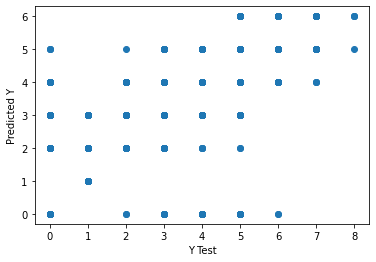

In [68]:
plt.scatter(test_y,pred_rfc)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

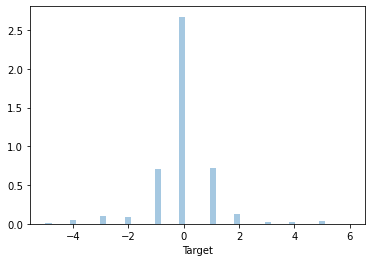

In [69]:
sns.distplot((test_y-pred_rfc),bins=50)

In [70]:
print('For Random Forest Model, we got an accuracy of',(rfc.score(test_X,test_y)*100),'%')

For Random Forest Model, we got an accuracy of 58.7890625 %


# Decision Tree Model

In [71]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6,min_samples_split=2,
                                               min_samples_leaf=5,max_features=10,random_state=1), 
                         n_estimators=100, random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=6,
                                                         max_features=10,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [72]:
dtree = DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=6,
                                                         max_features=10,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                                                         random_state=1,
                                                         splitter='best',)

In [73]:
dtree.fit(train_X,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [74]:
pred_dtree = dtree.predict(test_X)

In [75]:
print(classification_report(test_y,pred_dtree))

              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83       547
         1.0       0.46      0.45      0.45        49
         2.0       0.87      0.36      0.51       243
         3.0       0.45      0.62      0.52       529
         4.0       0.48      0.53      0.50       627
         5.0       0.45      0.49      0.47       382
         6.0       0.53      0.17      0.26       149
         7.0       0.00      0.00      0.00        30
         8.0       0.00      0.00      0.00         4

    accuracy                           0.56      2560
   macro avg       0.45      0.38      0.39      2560
weighted avg       0.58      0.56      0.55      2560



In [76]:
print(confusion_matrix(test_y,pred_dtree))

[[437   7   0  89  10   4   0   0   0]
 [  0  22   6  21   0   0   0   0   0]
 [  2  11  88 129  12   1   0   0   0]
 [  5   8   7 327 173   9   0   0   0]
 [ 41   0   0 141 333 112   0   0   0]
 [ 24   0   0  25 133 189  11   0   0]
 [  2   0   0   0  32  89  26   0   0]
 [  0   0   0   0   2  19   9   0   0]
 [  0   0   0   0   0   1   3   0   0]]


In [77]:
#performance metrics
print('Training:')
regressionSummary(train_y, dtree.predict(train_X))
print('\n')
print('Validation:')
regressionSummary(valid_y, dtree.predict(valid_X))
print('\n')
print('Testing:')
regressionSummary(test_y, dtree.predict(test_X))

Training:

Regression statistics

               Mean Error (ME) : 0.0411
Root Mean Squared Error (RMSE) : 1.1934
     Mean Absolute Error (MAE) : 0.6486


Validation:

Regression statistics

               Mean Error (ME) : 0.0362
Root Mean Squared Error (RMSE) : 1.1896
     Mean Absolute Error (MAE) : 0.6407


Testing:

Regression statistics

               Mean Error (ME) : 0.0141
Root Mean Squared Error (RMSE) : 1.2219
     Mean Absolute Error (MAE) : 0.6797


Text(0, 0.5, 'Predicted Y')

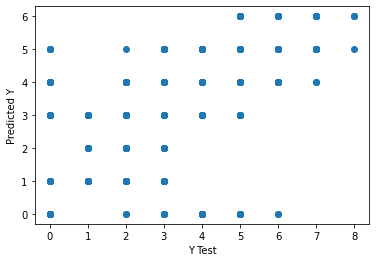

In [78]:
plt.scatter(test_y,pred_dtree)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

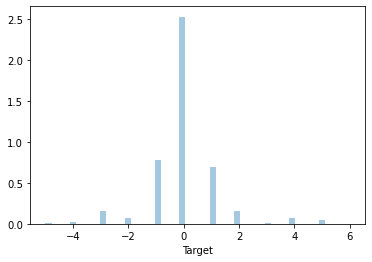

In [79]:
sns.distplot((test_y-pred_dtree),bins=50)

In [80]:
print('For Decision Tree Model, we got an accuracy of',(dtree.score(test_X,test_y)*100),'%')

For Decision Tree Model, we got an accuracy of 55.54687499999999 %


# MLP Classifier

In [81]:
hidden_layer=[]
for l in range(1,6):
    for n in range(1,10):
        hidden_layer.append((l,n))
hidden_layer

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9)]

In [82]:
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': hidden_layer,
    'activation':  ['identity', 'logistic', 'tanh', 'relu'],
    }

gridSearch = GridSearchCV(MLPClassifier(#activation='logistic',
    solver='lbfgs', 
    random_state=1,max_iter=1000),param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.575425625488663
Initial parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (4, 9)}


In [83]:
display=['param_hidden_layer_sizes', 'mean_test_score', 'std_test_score']
print(pd.DataFrame(gridSearch.cv_results_)[display])

    param_hidden_layer_sizes  mean_test_score  std_test_score
0                     (1, 1)         0.402066        0.009623
1                     (1, 2)         0.402066        0.009422
2                     (1, 3)         0.402066        0.009422
3                     (1, 4)         0.401909        0.009495
4                     (1, 5)         0.402535        0.009468
..                       ...              ...             ...
175                   (5, 5)         0.498670        0.007622
176                   (5, 6)         0.510867        0.015638
177                   (5, 7)         0.526178        0.023533
178                   (5, 8)         0.539942        0.011159
179                   (5, 9)         0.493666        0.059884

[180 rows x 3 columns]


In [84]:
from sklearn.neural_network import MLPClassifier
# train neural network with 2 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=(4,9), activation='tanh', solver='lbfgs',
                    random_state=1,max_iter=300)
clf.fit(train_X, train_y.values)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 9), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [85]:
pred_clf = clf.predict(test_X)

In [86]:
print(classification_report(test_y,pred_clf))

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       547
         1.0       1.00      0.49      0.66        49
         2.0       0.69      0.45      0.55       243
         3.0       0.48      0.51      0.50       529
         4.0       0.44      0.60      0.51       627
         5.0       0.44      0.38      0.41       382
         6.0       0.53      0.28      0.36       149
         7.0       0.00      0.00      0.00        30
         8.0       0.00      0.00      0.00         4

    accuracy                           0.56      2560
   macro avg       0.49      0.39      0.42      2560
weighted avg       0.56      0.56      0.55      2560



In [87]:
print('Training:')
regressionSummary(train_y, clf.predict(train_X))
print('\n')
print('Validation:')
regressionSummary(valid_y, clf.predict(valid_X))
print('\n')
print('Testing:')
regressionSummary(test_y, clf.predict(test_X))

Training:

Regression statistics

               Mean Error (ME) : 0.0846
Root Mean Squared Error (RMSE) : 1.2408
     Mean Absolute Error (MAE) : 0.6686


Validation:

Regression statistics

               Mean Error (ME) : 0.0766
Root Mean Squared Error (RMSE) : 1.2129
     Mean Absolute Error (MAE) : 0.6571


Testing:

Regression statistics

               Mean Error (ME) : 0.0566
Root Mean Squared Error (RMSE) : 1.2570
     Mean Absolute Error (MAE) : 0.6871


In [88]:
print('For MLPClassifier Model, we got an accuracy of',(clf.score(test_X,test_y)*100),'%')

For MLPClassifier Model, we got an accuracy of 55.703125 %


# Gradient Boosting

In [ ]:
#computationally expensive to run
clf = AdaBoostClassifier(GradientBoostingClassifier(min_samples_split=9,min_samples_leaf=1,
                                                    max_depth=6,subsample=0.75,max_features=10,
                                                    learning_rate=0.13,random_state=1), 
                         n_estimators=2000, random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)

In [89]:
gb = GradientBoostingClassifier()

In [90]:
gb.fit(train_X,train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [91]:
pred_gb = gb.predict(test_X)

In [92]:
#performance metrics
print('Training:')
regressionSummary(train_y, gb.predict(train_X))
print('\n')
print('Validation:')
regressionSummary(valid_y, gb.predict(valid_X))
print('\n')
print('Testing:')
regressionSummary(test_y, gb.predict(test_X))

Training:

Regression statistics

               Mean Error (ME) : -0.0330
Root Mean Squared Error (RMSE) : 0.8888
     Mean Absolute Error (MAE) : 0.3894


Validation:

Regression statistics

               Mean Error (ME) : -0.0284
Root Mean Squared Error (RMSE) : 1.0470
     Mean Absolute Error (MAE) : 0.5578


Testing:

Regression statistics

               Mean Error (ME) : -0.0543
Root Mean Squared Error (RMSE) : 1.0838
     Mean Absolute Error (MAE) : 0.5840


Text(0, 0.5, 'Predicted Y')

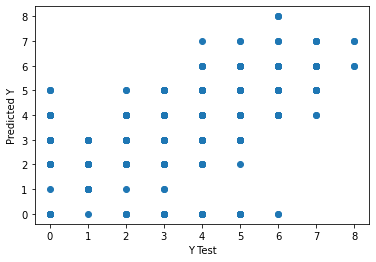

In [93]:
plt.scatter(test_y,pred_gb)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

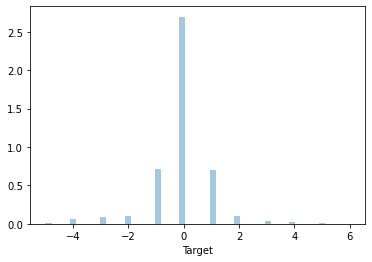

In [94]:
sns.distplot((test_y-pred_gb),bins=50)

In [95]:
print('For GradientBoostingRegressor Model, we got an accuracy of',(gb.score(test_X,test_y)*100),'%')

For GradientBoostingRegressor Model, we got an accuracy of 59.29687500000001 %


# Extra Tree Classifier

In [96]:
clf = AdaBoostClassifier(ExtraTreesClassifier(max_depth=6,min_samples_split=2,
                                               min_samples_leaf=5,max_features=10,random_state=1), 
                         n_estimators=100, random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=6,
                                                       max_features=10,
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=5,
                                                       min_samples_split=2,
                                                       min_weight_fra

In [97]:
etree = ExtraTreesClassifier(bootstrap=False,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=6,
                                                       max_features=10,
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=5,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                       n_jobs=None,
                                                       oob_score=False,
                                                       random_state=1,
                                                       verbose=0,
                                                       warm_start=False)

In [98]:
etree.fit(train_X,train_y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=6, max_features=10,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [99]:
pred_etree = etree.predict(test_X)

In [100]:
#performance metrics
print('Training:')
regressionSummary(train_y, etree.predict(train_X))
print('\n')
print('Validation:')
regressionSummary(valid_y, etree.predict(valid_X))
print('\n')
print('Testing:')
regressionSummary(test_y, etree.predict(test_X))

Training:

Regression statistics

               Mean Error (ME) : 0.4086
Root Mean Squared Error (RMSE) : 1.4839
     Mean Absolute Error (MAE) : 0.8026


Validation:

Regression statistics

               Mean Error (ME) : 0.4151
Root Mean Squared Error (RMSE) : 1.5207
     Mean Absolute Error (MAE) : 0.8351


Testing:

Regression statistics

               Mean Error (ME) : 0.3656
Root Mean Squared Error (RMSE) : 1.4668
     Mean Absolute Error (MAE) : 0.8102


In [101]:
print('For Extra Tree Classifier Model, we got an accuracy of',(etree.score(test_X,test_y)*100),'%')

For Extra Tree Classifier Model, we got an accuracy of 55.5078125 %


# TEST MODEL VS ACTUALS

In [102]:
#dataframe to compare actual values vs the predicted values
test = pd.DataFrame({'Actual': test_y, 'KNN': pred_knn,
                     'SVC': pred_svc, 'Lasso': pred_lassoCV,
                     'Ridge':pred_ridge, 'Random Forest': pred_rfc,
                     'Decision Tree': pred_dtree, 
                     'MLPClassifier': pred_clf,
                     'Gradient Boosting': pred_gb, 'Extra Tree' : pred_etree}) 

In [103]:
test

,Actual,KNN,SVC,Lasso,Ridge,Random Forest,Decision Tree,MLPClassifier,Gradient Boosting,Extra Tree
12025,4.0,3.0,4.0,3.262933,3.120608,4.0,4.0,3.0,2.0,4.0
8355,5.0,4.0,5.0,3.619470,3.460845,5.0,5.0,5.0,4.0,4.0
5305,3.0,0.0,0.0,1.722692,2.285066,3.0,3.0,4.0,4.0,0.0
4625,6.0,5.0,5.0,4.742942,3.976265,5.0,5.0,5.0,5.0,5.0
10778,0.0,0.0,0.0,1.231434,1.917329,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10621,6.0,6.0,6.0,5.371140,4.424551,6.0,6.0,6.0,6.0,6.0
5313,0.0,3.0,4.0,2.367835,2.554405,4.0,4.0,3.0,4.0,4.0
2694,0.0,0.0,0.0,2.508976,2.902660,0.0,0.0,0.0,0.0,0.0
858,4.0,5.0,5.0,6.208523,4.804378,5.0,5.0,5.0,6.0,5.0


In [104]:
test.describe()

,Actual,KNN,SVC,Lasso,Ridge,Random Forest,Decision Tree,MLPClassifier,Gradient Boosting,Extra Tree
count,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000
mean,2.998438,2.538281,2.613281,3.052347,3.046428,3.024219,2.984375,2.941797,3.052734,2.632812
std,1.920457,1.961355,1.999331,1.388031,0.783069,1.724533,1.737274,1.789895,1.801814,1.944807
min,0.000000,0.000000,0.000000,-0.424015,0.811201,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.896860,2.430562,2.000000,2.000000,2.000000,2.000000,0.000000
50%,3.000000,3.000000,3.000000,2.974837,2.970705,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,3.892638,3.574274,4.000000,4.000000,4.000000,4.000000,4.000000
max,8.000000,6.000000,7.000000,6.894997,5.295647,6.000000,6.000000,6.000000,8.000000,6.000000


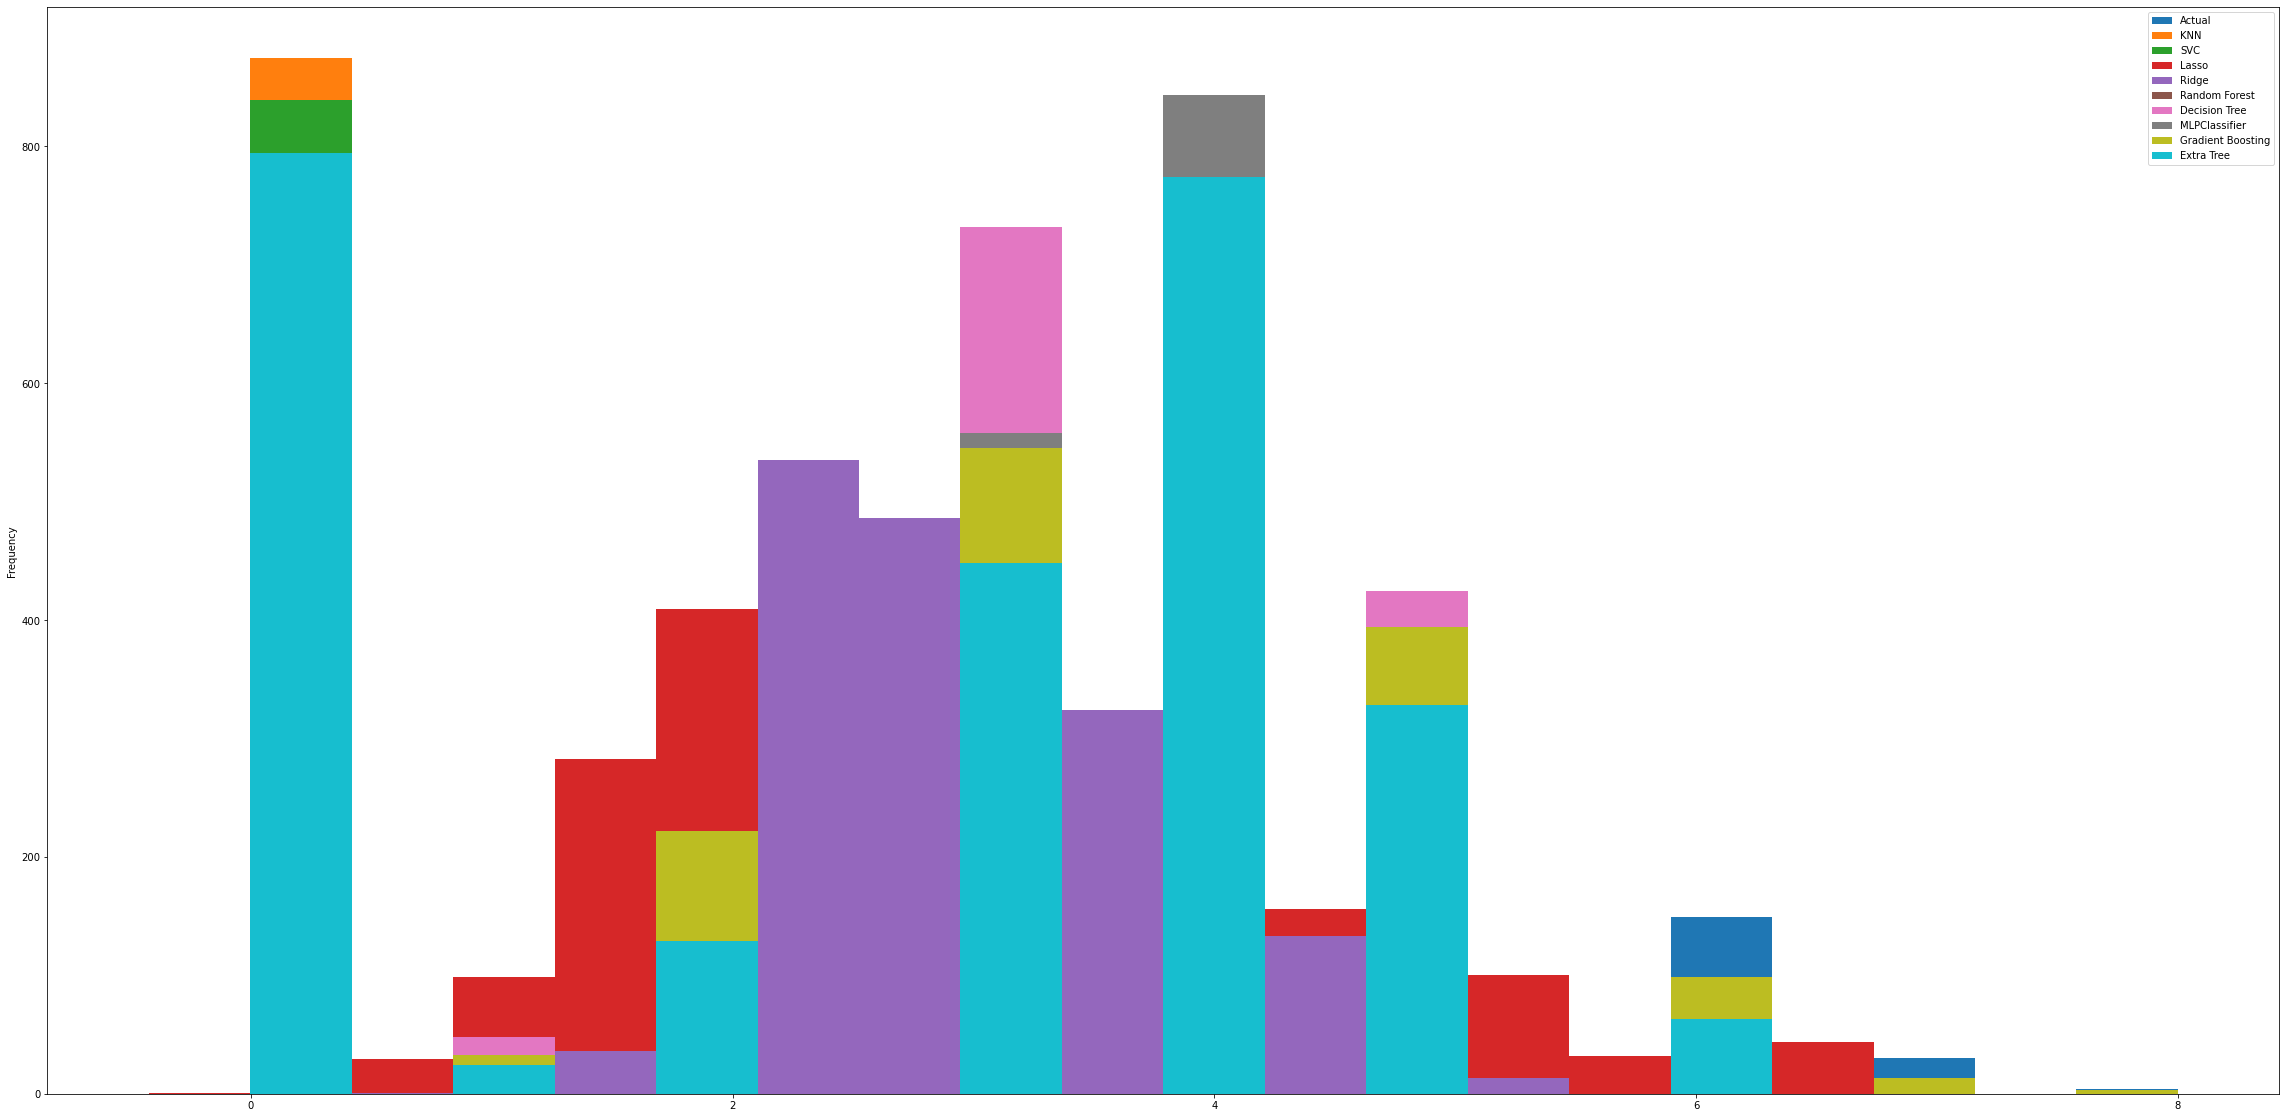

In [105]:
plt.rcParams['figure.figsize'] = [40, 20]
test.plot.hist(bins=20)

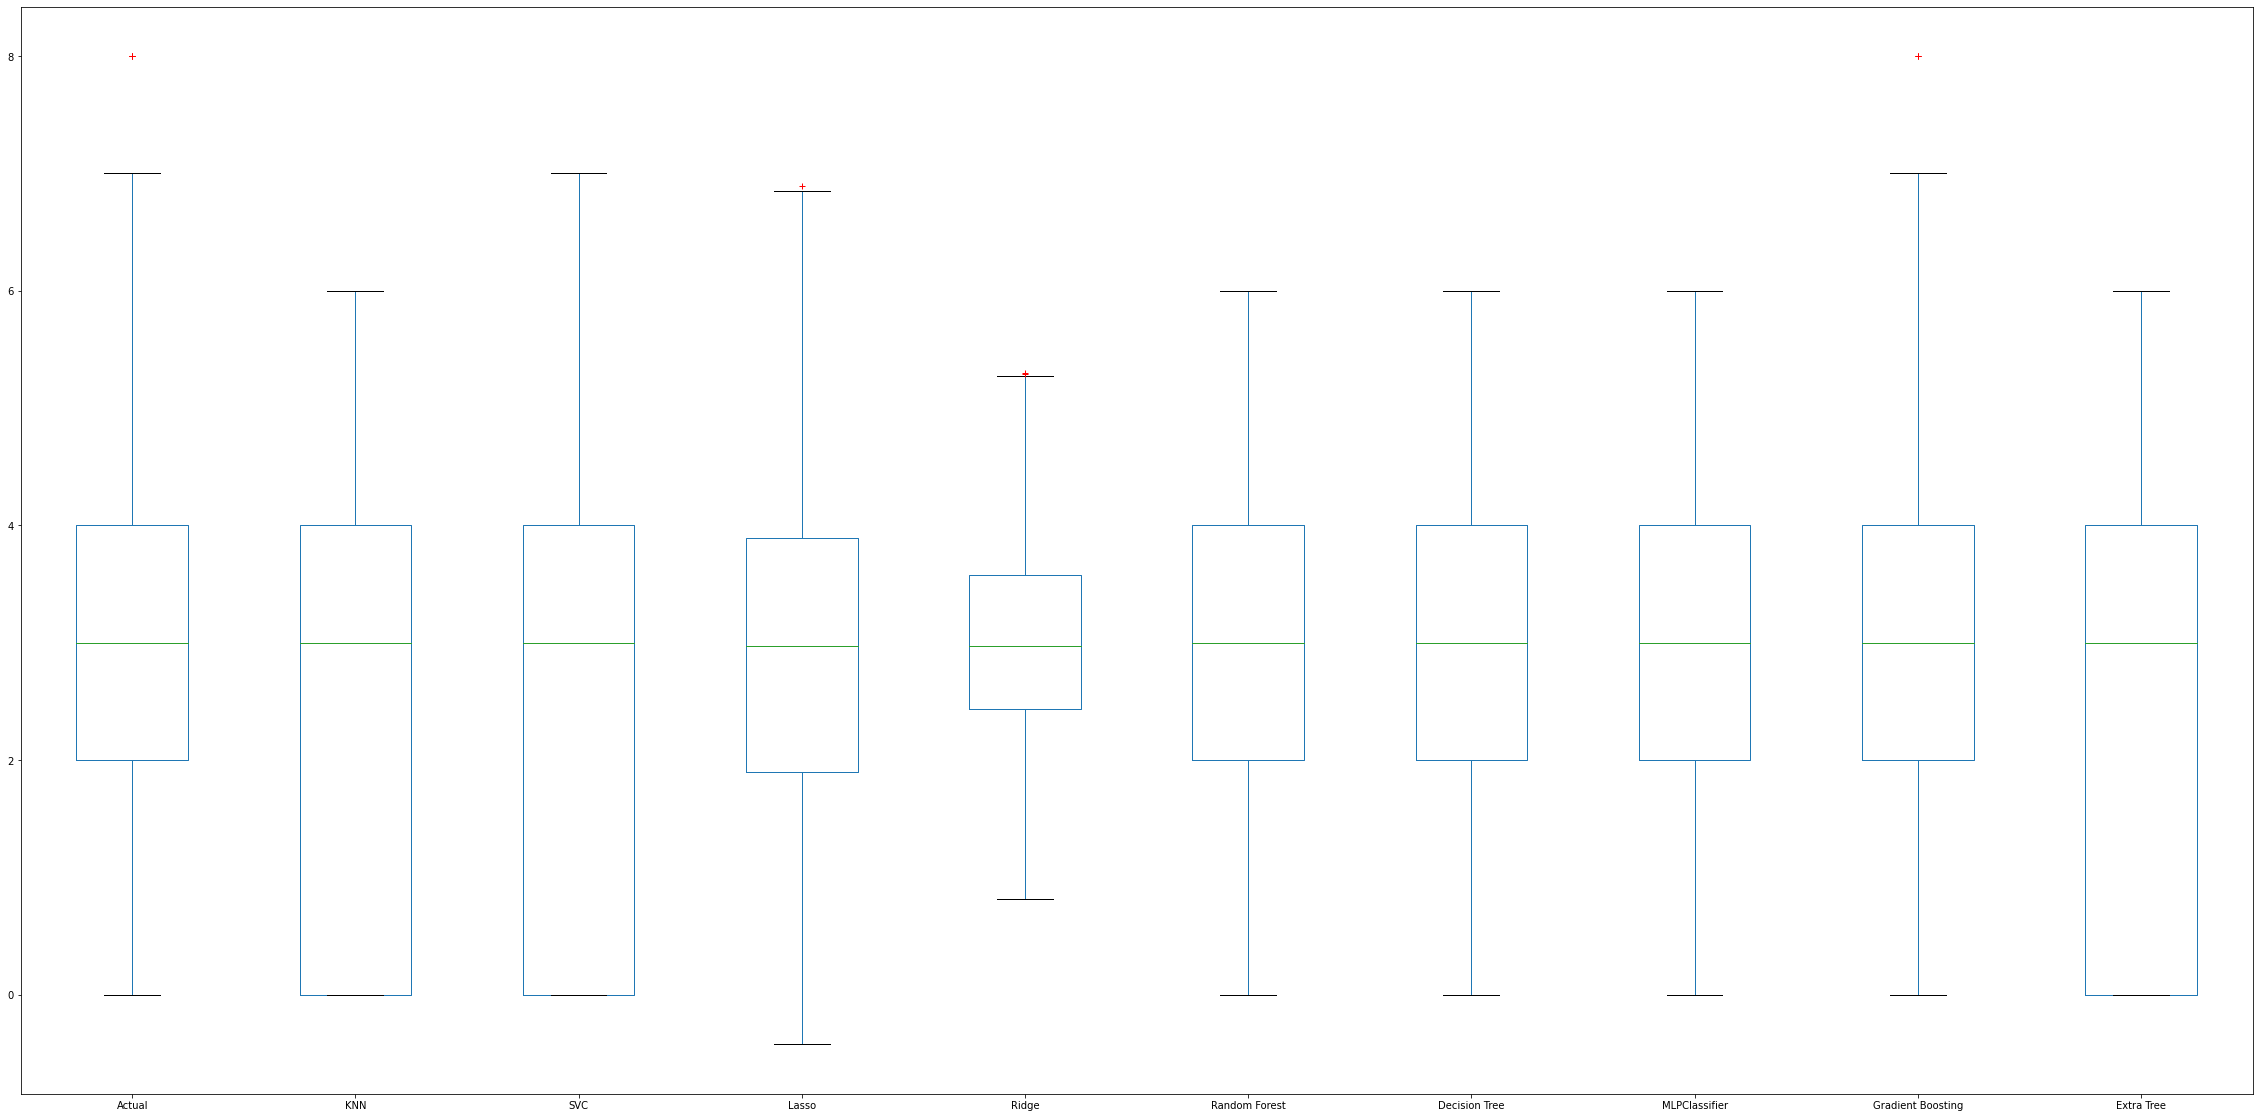

In [106]:
test.plot.box(sym='r+')

In [109]:
#performance metrics for model summary
import sklearn.metrics as metrics

knn_acc = metrics.accuracy_score(test_y, pred_knn)
knn_mse = metrics.mean_squared_error(test_y, pred_knn)

svc_acc = metrics.accuracy_score(test_y, pred_svc)
svc_mse = metrics.mean_squared_error(test_y, pred_svc)

lasso_mse = metrics.mean_squared_error(test_y, pred_lassoCV) 

ridge_mse = metrics.mean_squared_error(test_y, pred_ridge)

rfc_acc = metrics.accuracy_score(test_y, pred_rfc)
rfc_mse = metrics.mean_squared_error(test_y, pred_rfc)

dtree_acc = metrics.accuracy_score(test_y, pred_dtree)
dtree_mse = metrics.mean_squared_error(test_y, pred_dtree)

clf_acc = metrics.accuracy_score(test_y, pred_clf)
clf_mse = metrics.mean_squared_error(test_y, pred_clf)

gb_acc = gb.score(test_X,test_y)
gb_mse = metrics.mean_squared_error(test_y, pred_gb)

etree_acc = etree.score(test_X,test_y)
etree_mse = metrics.mean_squared_error(test_y, pred_etree)

In [110]:
performance_summary = pd.DataFrame({'KNN': knn_acc,
                     'SVC': svc_acc,'Random Forest': rfc_acc,
                     'Decision Tree': dtree_acc, 
                     'MLPClassifier': clf_acc, 'Gradient Boosing' : gb_acc,
                    'Extra Tree Classifier': etree_acc},index={'Accuracy Score'} )

In [111]:
performance_summary

,KNN,SVC,Random Forest,Decision Tree,MLPClassifier,Gradient Boosing,Extra Tree Classifier
Accuracy Score,0.455078,0.483984,0.587891,0.555469,0.557031,0.592969,0.555078


In [112]:
print('MSE:')
print('KNN',knn_mse)
print('SVC',svc_mse)
print('Lasso',lasso_mse)
print('Ridge',ridge_mse)
print('Random Forest',rfc_mse)
print('Decision Tree',dtree_mse)
print('MLPClassifier',clf_mse)
print('Gradient Boosting',gb_mse)
print('Extra Tree',etree_mse)

MSE:
KNN 2.5015625
SVC 2.33515625
Lasso 1.7468272188988672
Ridge 2.12841491732367
Random Forest 1.24765625
Decision Tree 1.49296875
MLPClassifier 1.580078125
Gradient Boosting 1.174609375
Extra Tree 2.1515625
